# Graphs for final report on Coughvid pre-processing

## Imports

In [1]:
# Data processing
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

# Audio files processing
import pyaudio
import wave
#import simpleaudio

# Manipualting File paths
from pathlib import Path
import os
import re
import glob

### Parameters

In [2]:
# Path to folder containing the data (can be used in both Linux and Windows)
data_path = Path(Path.cwd().parent, "datasets","coughvid_dataset_updated")
print(f"Data folder: {data_path}")

metadata_summary_path = os.path.join(data_path, 'coughvid_metadata.csv')
print(f"Data summary file: {metadata_summary_path}")

uncleaned_metadata_path = Path(Path.cwd().parent, "metadata_compiled.csv")
print(f"Uncleaned data summary file: {uncleaned_metadata_path}")

Data folder: C:\Users\antre\Documents\mlp2_project\datasets\coughvid_dataset_updated
Data summary file: C:\Users\antre\Documents\mlp2_project\datasets\coughvid_dataset_updated\coughvid_metadata.csv
Uncleaned data summary file: C:\Users\antre\Documents\mlp2_project\metadata_compiled.csv


## Paths

In [3]:
metadata_summary = pd.read_csv(metadata_summary_path, delimiter = ',')
metadata_uncleaned = pd.read_csv(uncleaned_metadata_path, delimiter = ',')

metadata_summary.info() 
metadata_summary.describe()

print("There are {} rows (observations) and {} columns in the metadata_summary DataFrame"\
      .format(metadata_summary.shape[0], metadata_summary.shape[1]))

print("There are {} rows (observations) and {} columns in the metadata_uncleaned DataFrame"\
      .format(metadata_uncleaned.shape[0], metadata_uncleaned.shape[1]))

cat_vars = ["gender", "status"]
num_vars = ["cough_detected"]
num_vars_2 = ["age", "length"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8997 entries, 0 to 8996
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uuid            8997 non-null   object 
 1   cough_detected  8997 non-null   float64
 2   SNR             8997 non-null   float64
 3   latitude        5443 non-null   float64
 4   longitude       5443 non-null   float64
 5   age             8511 non-null   float64
 6   gender          8997 non-null   object 
 7   status          8997 non-null   object 
 8   length          8997 non-null   float64
dtypes: float64(6), object(3)
memory usage: 632.7+ KB
There are 8997 rows (observations) and 9 columns in the metadata_summary DataFrame
There are 27550 rows (observations) and 51 columns in the metadata_uncleaned DataFrame


## Create single dataframe for cleaned and uncleaned datasets

In [4]:
age =  list(metadata_uncleaned["age"]) + list(metadata_summary["age"])
gender = list(metadata_uncleaned["gender"]) + list(metadata_summary["gender"])
status = list(metadata_uncleaned["status"]) + list(metadata_summary["status"])
cough_detected =  list(metadata_uncleaned["cough_detected"]) + list(metadata_summary["cough_detected"])
data =  ["Raw"]*27550 + ["Cleaned"]*8997

combined = pd.DataFrame()
combined["age"] = age
combined["status"] = status
combined["cough detection confidence"] = cough_detected
combined["gender"] = gender
combined["Dataset"] = data

combined.head()

,age,status,cough detection confidence,gender,Dataset
0,NaN,unknown,0.0155,unknown,Raw
1,15.0,healthy,0.9609,male,Raw
2,46.0,healthy,0.1643,female,Raw
3,34.0,healthy,0.9301,male,Raw
4,NaN,unknown,0.0482,unknown,Raw


In [5]:
print(set(metadata_uncleaned["status"]))
print(set(metadata_summary["status"]))

{'symptomatic', 'unknown', 'COVID-19', 'healthy'}
{'healthy', 'COVID-19'}


## Data Exploration

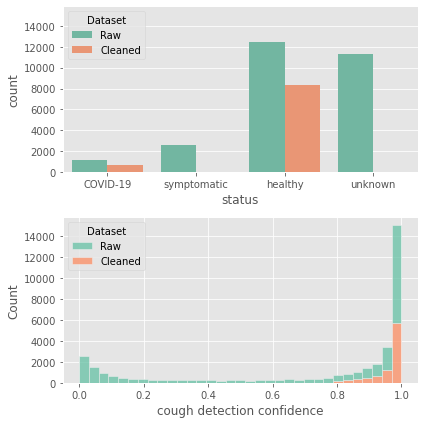

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharey=True)

sns.countplot(ax=axes[0], x="status", hue="Dataset", palette="Set2", data=combined, order=["COVID-19", "symptomatic", "healthy","unknown"])
sns.histplot(combined, x="cough detection confidence", hue="Dataset", palette="Set2", ax=axes[1], multiple="stack")

#sns.countplot(ax=axes[1], x="gender", hue="Dataset", palette="Set2", data=combined, order=["female", "male", "other", "unknown"]) 

fig.tight_layout()
plt.savefig("eda.pdf")

In [ ]:
combined

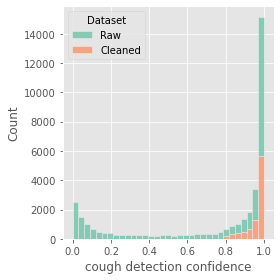

In [136]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4), sharey=True)

sns.histplot(combined, x="cough detection confidence", hue="Dataset", palette="Set2", ax=axes, multiple="stack")

fig.tight_layout()
plt.savefig("Numerical_vars.pdf")

## Graphs on Audio Segmentation

In [42]:
import librosa
sns.set_theme()

audio, sr = librosa.load(Path(data_path,"dataset_wav","00c2b443-4746-4337-857b-e705ddf6e133.wav"), sr=16000)

non_silent = librosa.effects.split(audio, top_db=25)
# for i in non_silent:
#     audio_trimmed = np.append(audio_trimmed, audio[i[0]: i[1]], axis=0)
# plt.plot(audio_trimmed)
# plt.show()

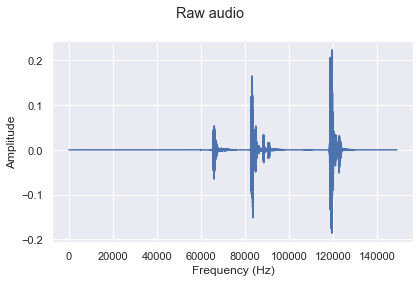

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
fig.suptitle('Raw audio')

axes.plot(audio)
axes.set(xlabel='Frequency (Hz)', ylabel='Amplitude')

fig.tight_layout()
plt.savefig("audio_raw.pdf")

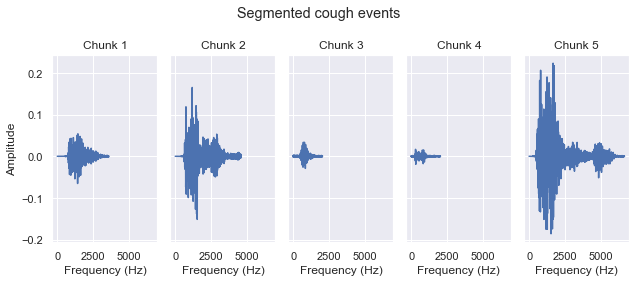

In [46]:
fig, axes = plt.subplots(1, len(non_silent), figsize=(9, 4), sharey=True, sharex=True)
fig.suptitle('Segmented cough events')

for i in range(len(non_silent)):
    i1 = non_silent[i][0]
    i2 = non_silent[i][1]
    axes[i].plot(audio[i1:i2])
    axes[i].set_title(f"Chunk {i+1}")
    
for ax in axes.flat:
    ax.set(xlabel='Frequency (Hz)', ylabel='Amplitude')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()    

fig.tight_layout()
plt.savefig("audio_chunks.pdf")

In [49]:
non_silent[0][1]

32256